# **Task 1 - Analog - Digital Conversion Using Pulse Code Modulation**

<hr>
<center> <h3><b>Registration No.: 2017331013</b></h3> </center>

**A program to simulate the analog-digital signal using Pulse Code Modulation.**

*The most common technique to change an analog signal to digital data (digitization) is called **pulse code modulation (PCM)**. A PCM encoder has three processes:*


1. The analog signal is sampled.
2. The sampled signal is quantized.
3. The quantized values are encoded as streams of bits.



In [153]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [107]:
def plot(x, y):
    plt.figure(figsize= (20, 10))
    plt.plot(x, y)
    plt.show()

An analog signal $x(t)$ can be represented as

$$ x(t)=Acos(2πft) $$

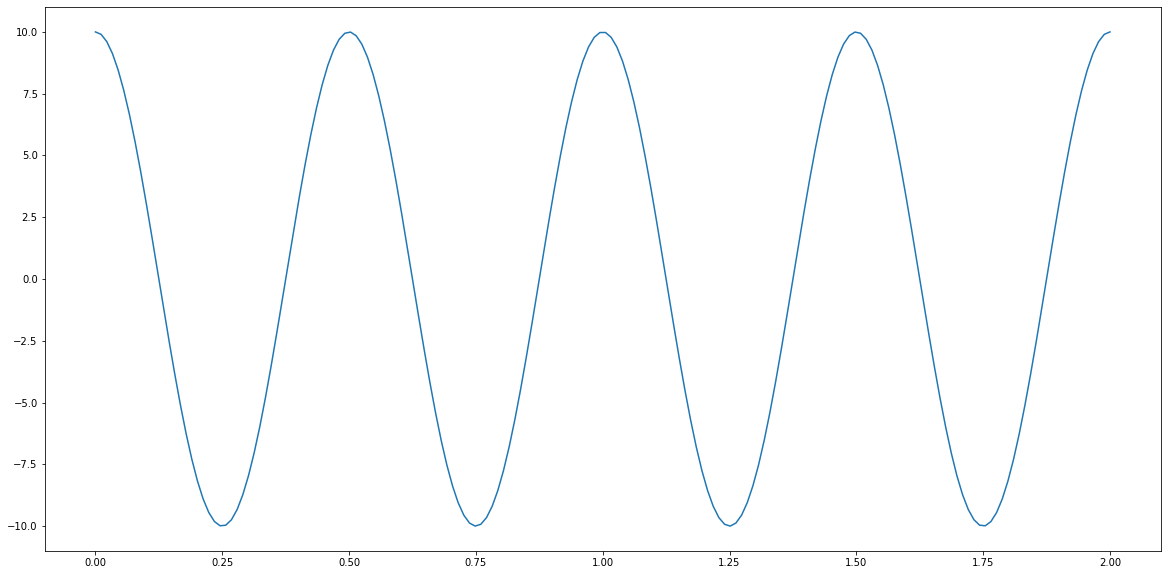

In [108]:
# create the signal with their basic properties like amplitude, frequency and time
'''
A - Amplitude of the signal
f - Frequency of the signal
t - Time variable of the signal
T - Time period of the signal
'''

A = 10                   
f = 2
T = 1 / f
t = np.linspace(0, 2.0, 180)
x_t = A * np.cos(2.0 * np.pi * f * t)

plot(t, x_t)

## (i) Sampling of the analog signal

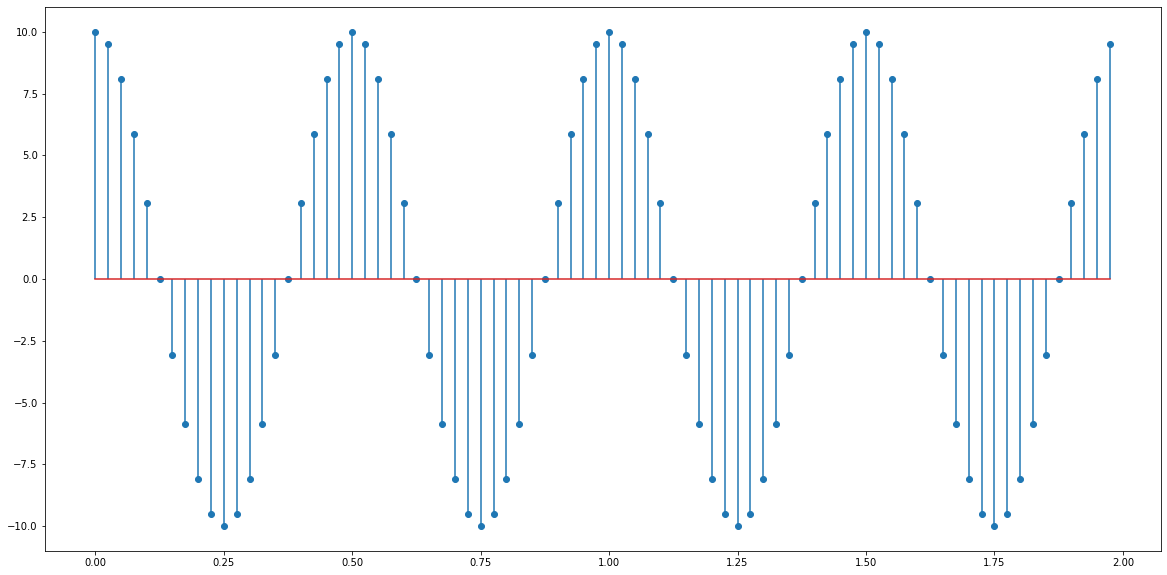

In [251]:
'''
n = number of samples per cycle
fs = number of samples per second
ts = sample points in time domain
'''

n = 20
fs = n * f
ts = np.arange(0, 2.0, 1 / fs)
x_n = A * np.cos(2 * np.pi * f * ts);

plt.figure(figsize= (20, 10))
plt.stem(ts, x_n)
plt.show()

## (ii) Quantization of the sampled signal

In [252]:
'''
b_bit       = b-bit quantizer, number of bits required to encode each quantization level. 
L           = number of uniformly spaced quantization levels
partitions  = points to regions of width delta, between vmin and vmax
q_levels    = the levels samples will be quantized to
xq          = quantized signal
'''

b_bit = 3
L = 2 ** b_bit
vmax = A;
vmin = -vmax;
delta = (vmax - vmin) / L
partitions = np.arange(vmin, vmax + delta, delta)
print(partitions)
# print(len(partitions))

q_levels = np.arange(vmin + (delta/2), vmax, delta) 
print(code_levels)
print(len(code_levels))

[-10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10. ]
[-8.75 -6.25 -3.75 -1.25  1.25  3.75  6.25  8.75]
8


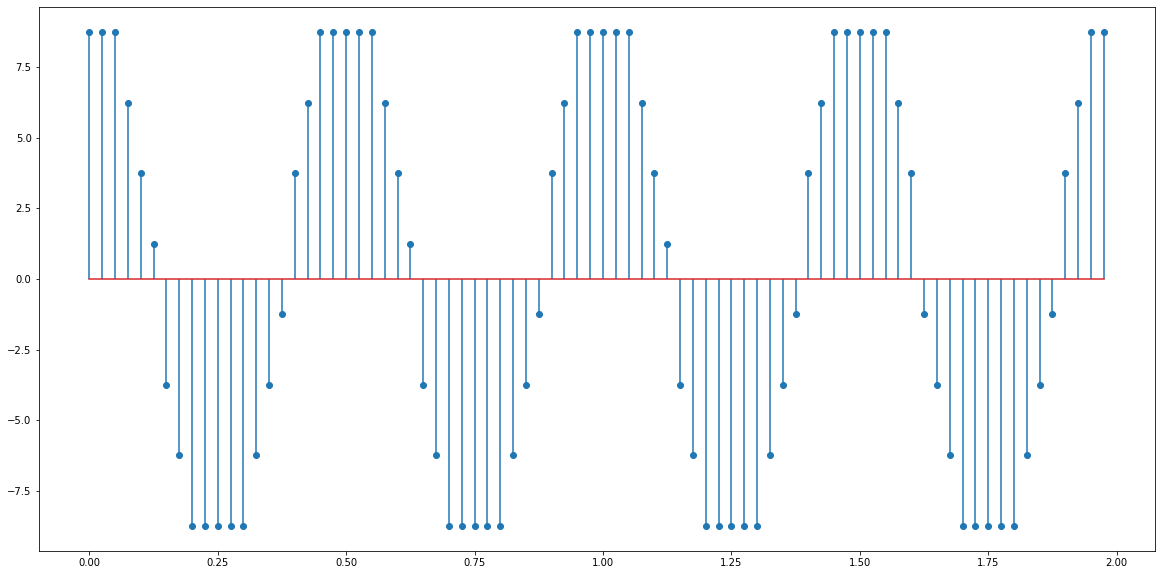

In [253]:
'''
x_q will contain the signal with quantized values
'''

x_q = np.copy(x_n)

for i in range (len(x_n)):
    # check which quantization level is appropriate for sample
    j = 0
    while ((j + 1) < len(partitions)):
        if (x_n[i] >= partitions[j]) and (x_n[i] <= partitions[j + 1]):
#             print(str(x_n[i]) + " is between " + str(partitions[j]) + " and " + str(partitions[j + 1]))
            x_q[i] = q_levels[j]
        j += 1
    i += 1

plt.figure(figsize= (20, 10))
plt.stem(ts, x_q)
plt.show()

## (iii) Encoding of the quantized signal

In [254]:
'''
encoding_map   = mapping of quantization levels to binary data points
'''

encoding_map = dict()
for i in range(0, L):
    encoding_map[q_levels[i]] = format(i, 'b').zfill(b_bit)

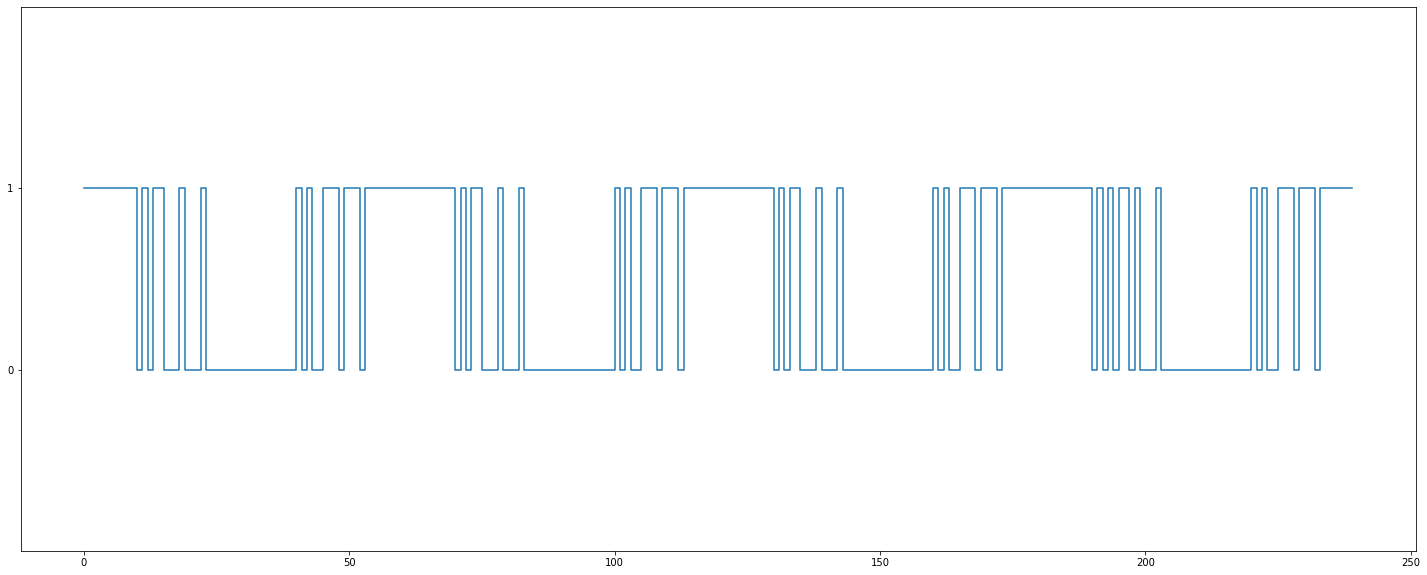

In [262]:
'''
x_b    = signal containing encoded binary values of the quantized signal x_q
tb     = time domain points to help plot x_b
'''

x_b = list()
for sample in x_q:
    for char in encoding_map[sample]:
        x_b.append(char)

tb = np.arange(len(x_b))

plt.figure(figsize=(25, 10))
plt.ylim(2, -1)
plt.step(tb, x_b)
plt.show()